In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [19]:
!mkdir -p network_file
!cd network_file/ && curl -O 'https://complexnetworks.eu-central-1.linodeobjects.com/polblogs.gml'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  954k  100  954k    0     0  1422k      0 --:--:-- --:--:-- --:--:-- 1427k


In [20]:
G = nx.read_gml('network_file/polblogs.gml', label='label')
G = nx.MultiDiGraph(G)

# Network Generals

In [21]:
print(nx.adjacency_matrix(G))

  (0, 1)	1
  (0, 20)	1
  (0, 22)	1
  (0, 54)	1
  (0, 67)	1
  (0, 84)	1
  (0, 114)	1
  (0, 154)	1
  (0, 189)	1
  (0, 240)	1
  (0, 255)	1
  (0, 256)	1
  (0, 322)	1
  (0, 366)	1
  (0, 433)	1
  (0, 482)	1
  (0, 497)	1
  (0, 567)	1
  (0, 574)	1
  (0, 640)	1
  (0, 641)	1
  (0, 643)	2
  (0, 663)	1
  (0, 1130)	1
  (0, 1244)	1
  :	:
  (1486, 1269)	1
  (1486, 1286)	1
  (1486, 1365)	1
  (1486, 1434)	1
  (1486, 1436)	1
  (1487, 1488)	1
  (1488, 774)	2
  (1488, 853)	1
  (1488, 854)	2
  (1488, 957)	1
  (1488, 962)	1
  (1488, 965)	1
  (1488, 999)	2
  (1488, 1007)	1
  (1488, 1008)	1
  (1488, 1023)	1
  (1488, 1036)	2
  (1488, 1125)	1
  (1488, 1345)	1
  (1488, 1363)	1
  (1488, 1420)	1
  (1488, 1436)	1
  (1488, 1437)	1
  (1488, 1487)	1
  (1489, 801)	1


In [22]:
n_nodes = len(set(G.nodes))
n_edges = len(G.edges)

print(f'The graph has {n_nodes} nodes and {n_edges} edges.')

The graph has 1490 nodes and 38177 edges.


In [23]:
liberals = list( n for n,d in G.nodes().items() if d['value'] == 0)
conservatives = list( n for n,d in G.nodes().items() if d['value'] == 1)

In [24]:
pct_liberals = round(len(liberals)*100/n_nodes, 2)
pct_conservatives = round(len(conservatives)*100/n_nodes, 2)

print(f'The graph contains {pct_liberals} % of liberal sites and {pct_conservatives} % of concervative sites')

The graph contains 50.87 % of liberal sites and 49.13 % of concervative sites


# Microscale

## Degree Analysis

In [25]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degree_sequence_names = sorted((n for n, d in G.degree()), reverse=True)
degree_dict = dict(sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True))
dmax = max(degree_sequence)

list(degree_dict.keys())[:10]

['blogsforbush.com',
 'dailykos.com',
 'instapundit.com',
 'atrios.blogspot.com',
 'talkingpointsmemo.com',
 'washingtonmonthly.com',
 'drudgereport.com',
 'powerlineblog.com',
 'michellemalkin.com',
 'hughhewitt.com']

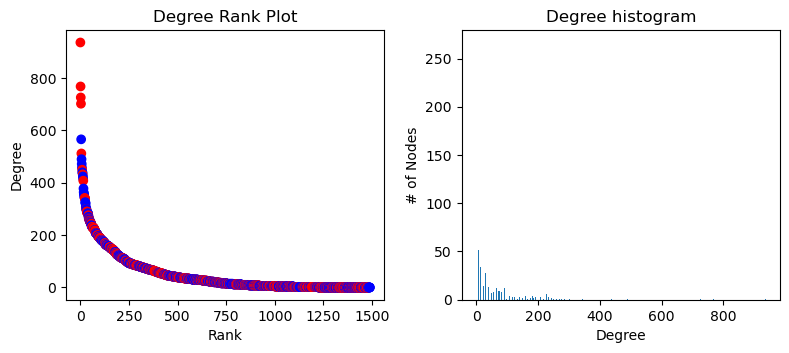

In [26]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

colors = [ "blue" if i in liberals else "red" for i in degree_sequence_names]
ax1 = fig.add_subplot(axgrid[3:, :2])
x = list(np.arange(0, len(degree_sequence), 1))
ax1.scatter(x, degree_sequence, s=None, marker="o", c=colors)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

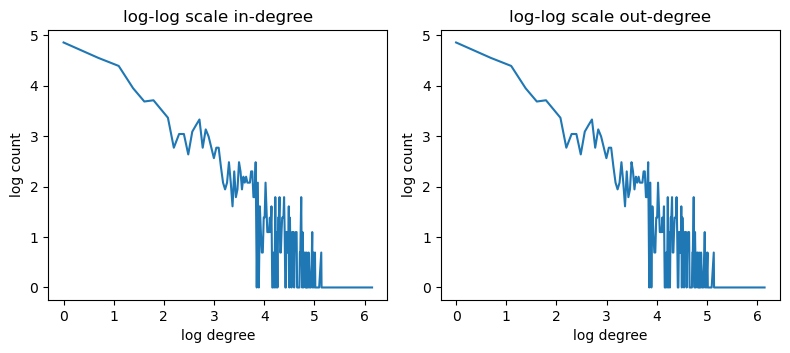

In [27]:
degree_sequence_in = sorted((d for n, d in G.in_degree()), reverse=True)
degree_sequence_out = sorted((d for n, d in G.out_degree()), reverse=True)


fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
x_in = np.unique(np.log(degree_sequence_in), return_counts=False)
y_in = np.log(np.unique(np.log(degree_sequence_in), return_counts=True)[1])
ax1.plot(x_in, y_in)
ax1.set_title("log-log scale in-degree")
ax1.set_ylabel("log count")
ax1.set_xlabel("log degree")

ax2 = fig.add_subplot(axgrid[3:, 2:])
x_out = np.unique(np.log(degree_sequence_out), return_counts=False)
y_out = np.log(np.unique(np.log(degree_sequence_out), return_counts=True)[1])
ax2.plot(x_out, y_out)
ax2.set_title("log-log scale out-degree")
ax2.set_ylabel("log count")
ax2.set_xlabel("log degree")

fig.tight_layout()
#print(f'Average in-degree exponent: {np.polyfit(x_in, y_in, 1)[0]}')
#print(f'Average out-degree exponent: {np.polyfit(x_out, y_out, 1)[0]}')
plt.show()

## Page Rank

In [28]:
page_rank = dict(sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse=True))

list(page_rank.keys())[:10]

['blogsforbush.com',
 'dailykos.com',
 'instapundit.com',
 'drudgereport.com',
 'atrios.blogspot.com',
 'talkingpointsmemo.com',
 'gevkaffeegal.typepad.com/the_alliance',
 'powerlineblog.com',
 'washingtonmonthly.com',
 'michellemalkin.com']

In [29]:
conservatives_in_top_10 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[:10])))
liberals_in_top_10 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[:10])))

print(f'Out of the top 10 pages by degree centrality, {liberals_in_top_10*10} % are liberals \
       and {conservatives_in_top_10*10} % are conservatives')


conservatives_in_top_50 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[10:50])))
liberals_in_top_50 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[10:50])))

print(f'Out of the top 50 pages by degree centrality, {round(liberals_in_top_50*100/40, 2)} % are liberals \
       and {round(conservatives_in_top_50*100/40, 2)} % are conservatives')


conservatives_in_top_100 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[50:100])))
liberals_in_top_100 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[50:100])))

print(f'Out of the top 100 pages by degree centrality, {round(liberals_in_top_100*100/50, 2)} % are liberals \
       and {round(conservatives_in_top_100*100/50, 2)} % are conservatives')

conservatives_in_top_500 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[100:1000])))
liberals_in_top_500 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[100:1000])))

print(f'Out of the top 500 pages by degree centrality, {liberals_in_top_500*100/400} % are liberals \
       and {conservatives_in_top_500*100/400} % are conservatives')


Out of the top 10 pages by degree centrality, 40 % are liberals        and 60 % are conservatives
Out of the top 50 pages by degree centrality, 55.0 % are liberals        and 45.0 % are conservatives
Out of the top 100 pages by degree centrality, 52.0 % are liberals        and 48.0 % are conservatives
Out of the top 500 pages by degree centrality, 104.25 % are liberals        and 120.75 % are conservatives


## Closeness Centrality

In [30]:
G_liberals = G.subgraph(liberals)
G_conservatives = G.subgraph(conservatives)

In [31]:
def compare_histograms(scores1, scores2, title, label1='Conservatives', label2='Liberals'):
    plt.figure(figsize=(7,5))
    plt.hist(scores1, histtype='step', label=label1, density=True, color='red')
    plt.hist(scores2, histtype='step', label=label2, density=True, color='blue')
    plt.legend(loc='upper right', fontsize='x-large')
    plt.ylabel('Probability')
    plt.xlabel(title)
    plt.show()

In [32]:
closeness_liberals = nx.closeness_centrality(G_liberals)
closeness_conservatives = nx.closeness_centrality(G_conservatives)

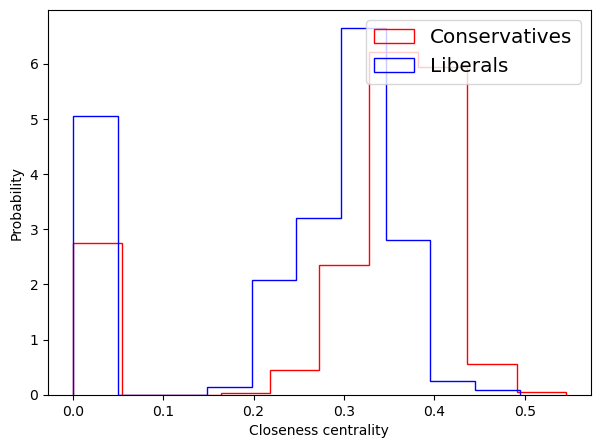

In [33]:
compare_histograms(closeness_conservatives.values(), closeness_liberals.values(), 'Closeness centrality')

## Clustering

In [34]:
G_liberals = nx.Graph(G_liberals)
G_conservatives = nx.Graph(G_conservatives)

In [35]:
clustering_liberals = nx.clustering(G_liberals)
clustering_conservatives = nx.clustering(G_conservatives)

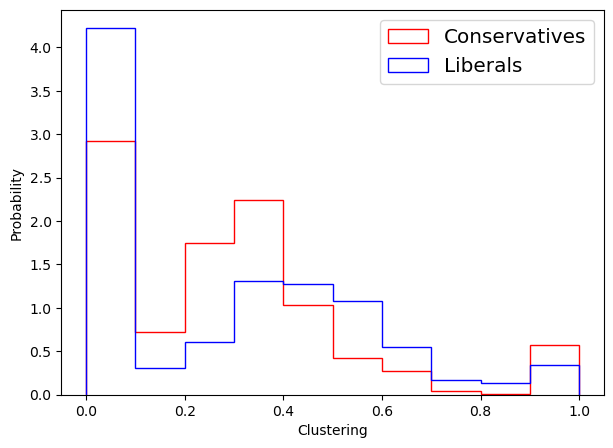

In [36]:

compare_histograms(clustering_conservatives.values(), clustering_liberals.values(), 'Clustering')

# Macro Scale

## Average Clustering

<AxesSubplot: >

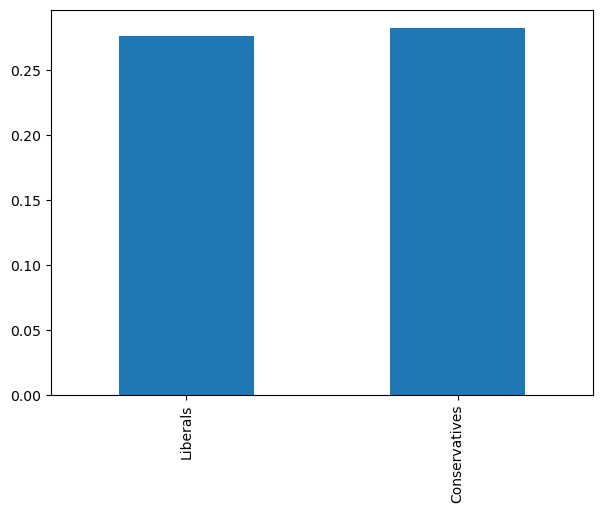

In [37]:
df_clusering = pd.DataFrame([nx.average_clustering(G_liberals), nx.average_clustering(G_conservatives)])
df_clusering.columns = ["AVG Clustering"]
df_clusering.index = ['Liberals', 'Conservatives']
df_clusering.plot(kind='bar',figsize=(7, 5), legend=None)

## Transitivity

<AxesSubplot: >

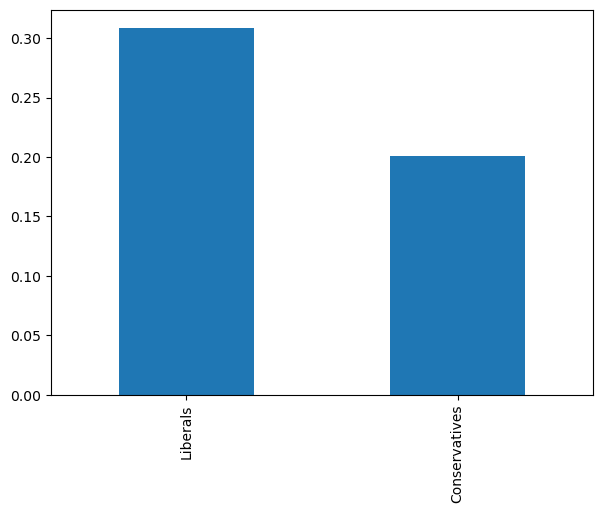

In [38]:
df_transitivity = pd.DataFrame([nx.transitivity(G_liberals), nx.transitivity(G_conservatives)])
df_transitivity.columns = ["Transitiviy"]
df_transitivity.index = ['Liberals', 'Conservatives']
df_transitivity.plot(kind='bar',figsize=(7, 5), legend=None)

## Models

In [45]:
BG = nx.barabasi_albert_graph(len(set(G.nodes)), 1, seed=None, initial_graph=None)

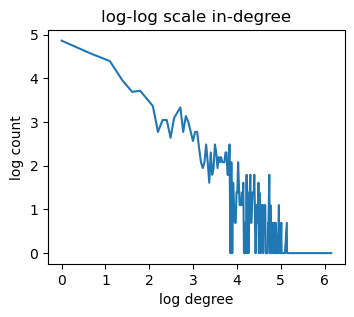

In [47]:
degree_sequence = sorted((d for n, d in BG.degree()), reverse=True)


fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
x_in = np.unique(np.log(degree_sequence_in), return_counts=False)
y_in = np.log(np.unique(np.log(degree_sequence_in), return_counts=True)[1])
ax1.plot(x_in, y_in)
ax1.set_title("log-log scale in-degree")
ax1.set_ylabel("log count")
ax1.set_xlabel("log degree")

plt.show()

## Communities

In [79]:
communities = nx.community.louvain_communities(G, weight='weight', resolution=0.1, threshold=1e-07)

In [85]:
resolutions = sorted([i/10 for i in range(1, 21)], reverse=True)

for resolution in resolutions:
    communities = nx.community.louvain_communities(G, weight='weight', resolution=resolution, threshold=1e-07)

    print(f'Resolution {resolution} gives {len(communities)} communities with an average size of {np.mean([len(c) for c in communities])}')

Resolution 2.0 gives 344 communities with an average size of 4.3313953488372094
Resolution 1.9 gives 342 communities with an average size of 4.356725146198831
Resolution 1.8 gives 335 communities with an average size of 4.447761194029851
Resolution 1.7 gives 338 communities with an average size of 4.408284023668639
Resolution 1.6 gives 325 communities with an average size of 4.584615384615384
Resolution 1.5 gives 330 communities with an average size of 4.515151515151516
Resolution 1.4 gives 316 communities with an average size of 4.715189873417722
Resolution 1.3 gives 310 communities with an average size of 4.806451612903226
Resolution 1.2 gives 307 communities with an average size of 4.85342019543974
Resolution 1.1 gives 301 communities with an average size of 4.95016611295681
Resolution 1.0 gives 295 communities with an average size of 5.0508474576271185
Resolution 0.9 gives 295 communities with an average size of 5.0508474576271185
Resolution 0.8 gives 289 communities with an averag